**PREDICTING LUMPY SKIN DISEASE PROJECT CODE**

In [ ]:
## Import Required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Common Function

## To Plot the chart between independent and Target Feature
def plotChart(dataset,CTarget_0_1,IndepFeature):
    plt.style.use('dark_background')
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.distplot(df_lumpy[df_lumpy[CTarget_0_1]==0][IndepFeature],label='Not Suffered By Lumpy',hist=False,color='green')
    sns.distplot(df_lumpy[df_lumpy[CTarget_0_1]==1][IndepFeature],label="Suffered By Lumpy",hist=False,color='red')
    plt.grid(True)
    plt.legend()
    plt.show()

def plotGraph(dataset,feature):
    plt.style.use('Solarize_Light2')
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.title(f'{feature} Distribution Graph')
    sns.distplot(dataset[feature],color="red")

    plt.subplot(2,2,2)
    plt.title(f'{feature} Histogram Graph',color="red")
    sns.histplot(dataset[feature],color='red',kde=True,bins=10)

    plt.subplot(2,2,3)
    plt.title(f'{feature} BoxPlot')
    sns.boxplot(dataset[feature],color="red")
    plt.show()

In [ ]:
## Import Data from CSV

In [ ]:
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [ ]:
## Check data whether it loads or not
df_lumpy.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24803 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24803 non-null  float64
 1   y                    24803 non-null  float64
 2   region               3039 non-null   object 
 3   country              3039 non-null   object 
 4   reportingDate        3039 non-null   object 
 5   cld                  24803 non-null  float64
 6   dtr                  24803 non-null  float64
 7   frs                  24803 non-null  float64
 8   pet                  24803 non-null  float64
 9   pre                  24803 non-null  float64
 10  tmn                  24803 non-null  float64
 11  tmp                  24803 non-null  float64
 12  tmx                  24803 non-null  float64
 13  vap                  24803 non-null  float64
 14  wet                  24803 non-null  float64
 15  elevation            24803 non-null 

In [ ]:
### Dataset details
# 1.data loads successfully
# 2.In the dataset we have total 24803 data-points and 19 dependent features and 1 independent/Target feature. (While data pre-processing we will ignore some of the unwanted features depends on the analysis)
# 3.Here we have 3 types of data (int,float and object/categorical)
# 4. 14 features have float type , 2 features have int type and 3 are object / categorical type data.
# 5. the data acquire 3.8+ MB machine memory.
# 6.The x and y feature looks like it is Latitude and Longitude geocoded. For better understanding, let rename the columns/features x to Longitude and y to Latitude.

In [ ]:
df_lumpy.duplicated().sum()

608

In [ ]:
## Here we have total 608 data points which is duplicate

In [ ]:
## Let's Remove the duplicate data points
df_lumpy= df_lumpy.drop_duplicates()

In [ ]:
df_lumpy.shape

(24195, 20)

In [ ]:
df_lumpy.head()

,x,y,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
df_lumpy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24195 entries, 0 to 24802
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   x                    24195 non-null  float64
 1   y                    24195 non-null  float64
 2   region               2431 non-null   object 
 3   country              2431 non-null   object 
 4   reportingDate        2431 non-null   object 
 5   cld                  24195 non-null  float64
 6   dtr                  24195 non-null  float64
 7   frs                  24195 non-null  float64
 8   pet                  24195 non-null  float64
 9   pre                  24195 non-null  float64
 10  tmn                  24195 non-null  float64
 11  tmp                  24195 non-null  float64
 12  tmx                  24195 non-null  float64
 13  vap                  24195 non-null  float64
 14  wet                  24195 non-null  float64
 15  elevation            24195 non-null 

In [ ]:
# Rename the features
df_lumpy.rename(columns={"x":"Longitude" , "y":"Latitude"},inplace=True,errors="raise")

In [ ]:
geolocation = df_lumpy[['Latitude','Longitude','country']]
geolocation.head()

,Latitude,Longitude,country
0,22.437184,90.380931,Bangladesh
1,22.986757,87.854975,India
2,23.610181,85.279935,India
3,43.882221,81.564510,China
4,43.834976,81.161057,China


In [ ]:
fig = px.scatter_geo(geolocation,lat='Latitude',lon='Longitude')
fig.update_layout(title = 'Lumpy Skin Disease Area', title_x=0.5)
fig.show()

In [ ]:
# 1.Above we plot the the map using Latitude and Longitude geocode. The blue area in map show that the spread Lumpy disease.
# 2.we can see that the disease are in almost all the countries.

Exploratory Data Analysis


In [ ]:
## Check the Data describtion
df_lumpy.describe()

,Longitude,Latitude,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
count,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000,24195.000000
mean,80.481799,46.589472,59.208758,9.148775,24.230508,0.793151,24.938859,-16.231928,-11.643703,-7.077462,3.644894,8.475692,164.813598,4.444844,618.578457,173.978322,0.100475
std,43.068859,19.376367,19.502036,3.006721,11.401773,1.181585,32.389637,17.554205,17.983279,18.560696,4.957740,6.245814,19.712574,2.416406,2302.448600,1140.246573,0.300639
min,-179.750000,-28.750000,0.000000,2.000000,0.000000,0.000000,0.000000,-52.100000,-48.100000,-44.200000,0.000000,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,46.750000,35.250000,43.400000,6.800000,23.800000,0.000000,5.700000,-30.600000,-26.000000,-21.200000,0.400000,2.880000,152.000000,3.000000,2.390413,0.000000,0.000000
50%,81.750000,49.250000,62.100000,8.300000,31.000000,0.200000,14.200000,-19.800000,-14.700000,-10.300000,1.400000,7.880000,161.000000,4.000000,37.428863,0.000207,0.000000
75%,110.750000,62.250000,75.000000,11.200000,31.000000,1.000000,31.500000,-2.700000,1.000000,4.400000,4.700000,12.690000,176.000000,4.000000,340.879526,0.002167,0.000000
max,179.750000,81.750000,98.700000,20.600000,31.000000,7.500000,341.900000,23.900000,28.500000,36.400000,28.600000,30.920000,249.000000,11.000000,167388.672700,56654.780150,1.000000


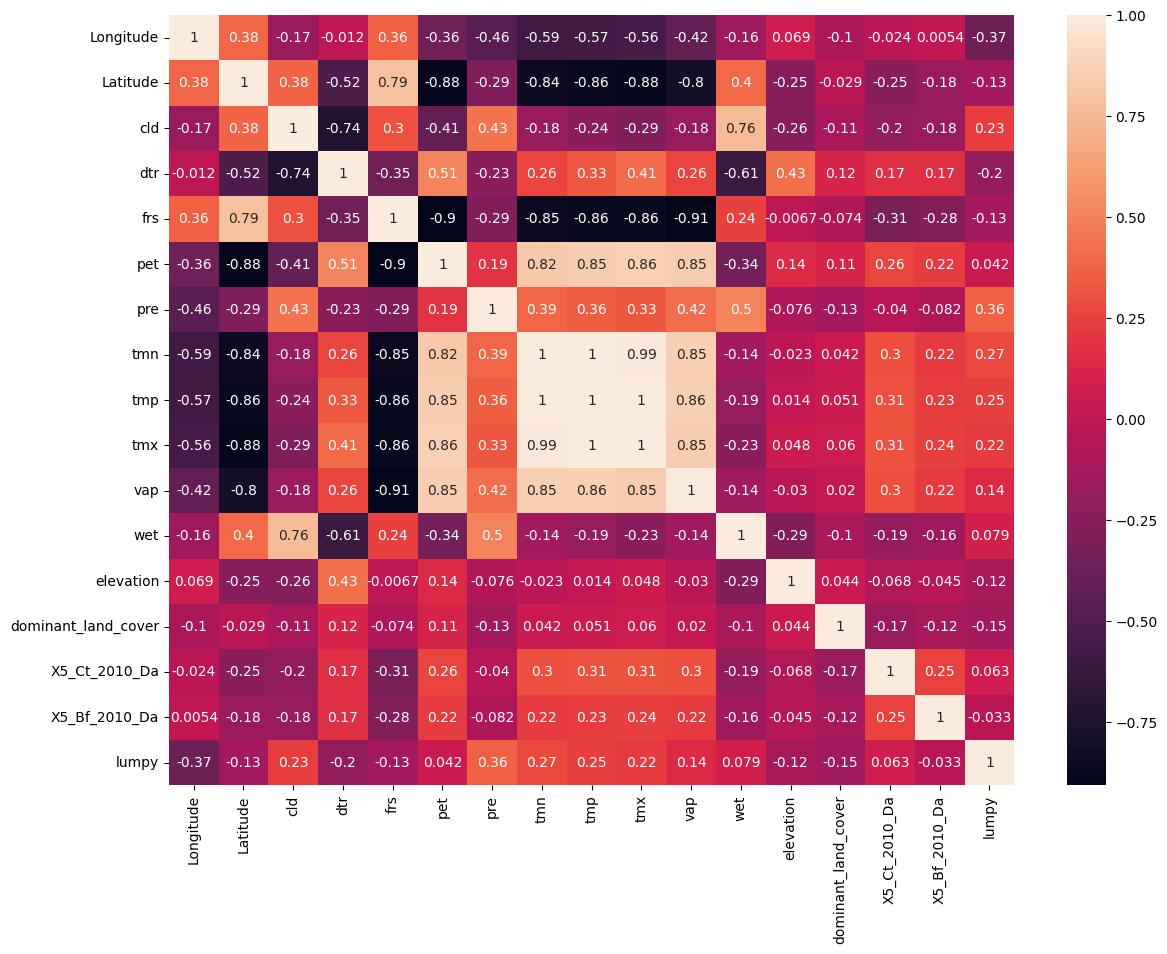

In [ ]:
## Check the co-rrelation
plt.figure(figsize=(30,10))
plt.subplot(121)
sns.heatmap(df_lumpy.corr(),annot=True)
plt.show()


Univarient Data **Analysis**

In [ ]:
df_lumpy.head()
#df_lumpy.style.highlight_null(null_color='red')

,Longitude,Latitude,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy
0,90.380931,22.437184,Asia,Bangladesh,10/9/2020,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1
1,87.854975,22.986757,Asia,India,20/12/2019,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1
2,85.279935,23.610181,Asia,India,20/12/2019,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1
3,81.564510,43.882221,Asia,China,25/10/2019,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1
4,81.161057,43.834976,Asia,China,25/10/2019,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1


In [ ]:
## 1.region
df_lumpy['region'].value_counts()

Europe    1809
Asia       538
Africa      84
Name: region, dtype: int64

In [ ]:
## From above values Count function we can say that,
# 1.there are 3 region where that Lumpy skin disease spreads.
# 2.From 3 regions
    # 1.On First place Europen Countries (2172) are highly suffered from Lumpy Skin Disease.
    # 2.On Second place Asian Countries (777)  are suffered from Lumpy Skin Disease.
    # 3.On Third place African Countries (90)  are suffered from Lumpy Skin Disease.
# 3.So Europen Countriers are quite not safe for animals and Countries should take the appropriate action.

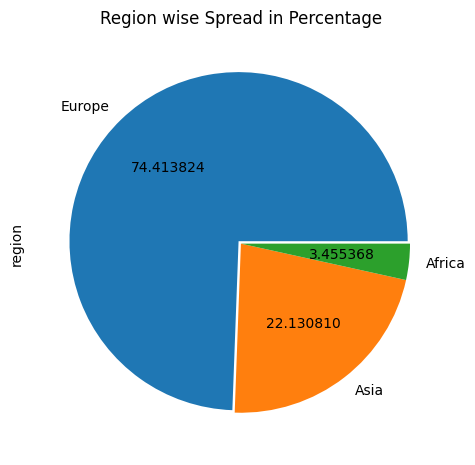

In [ ]:
plt.figure(figsize=(12,40))
plt.subplot(121)
df_lumpy['region'].value_counts().plot.pie(autopct="%2f",explode=(0.02,0,0),title = "Region wise Spread in Percentage")
plt.show()

**2.Country**

In [ ]:
df_lumpy['country'].nunique()
# 1.There are total 37 country who are suffered by Lumy Skin Disease which are belongs to

37

In [ ]:
pd.DataFrame(df_lumpy['country'].unique())

,0
0,Bangladesh
1,India
2,China
3,Israel
4,Russian Federation
5,West Bank
6,Syrian Arab Republic
7,Georgia
8,Namibia
9,Montenegro


In [ ]:
## These are the countries in which the disease found

<Axes: xlabel='region,country'>

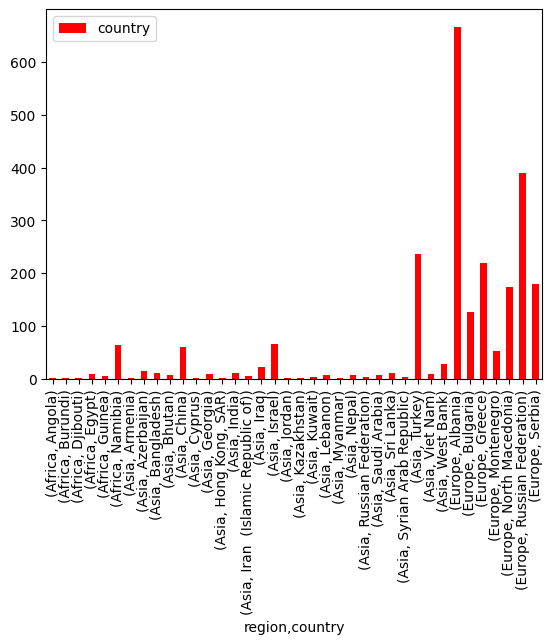

In [ ]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).plot(kind="bar",color="red")

In [ ]:
pd.DataFrame(df_lumpy.groupby(['region','country'])['country'].count()).rename(columns={'country' : "CountryCount"}) ##.sort_values(by="CountryCount",ascending=False)

CountryCount
region country                                  
Africa Angola                                  1
       Burundi                                 2
       Djibouti                                1
       Egypt                                  10
       Guinea                                  6
       Namibia                                64
Asia   Armenia                                 1
       Azerbaijan                             16
       Bangladesh                             11
       Bhutan                                  7
       China                                  61
       Cyprus                                  2
       Georgia                                10
       Hong Kong, SAR                          1
       India                                  12
       Iran  (Islamic Republic of)             5
       Iraq                                   23
       Israel                                 66
       Jordan                                  2
       Kazakhstan                              2
       Kuwait                                  3
       Lebanon                                 7
       Myanmar                                 1
       Nepal                                   8
       Russian Federation                      4
       Saudi Arabia                            8
       Sri Lanka                              11
       Syrian Arab Republic                    3
       Turkey                                236
       Viet Nam                               10
       West Bank                              28
Europe Albania                               666
       Bulgaria                              127
       Greece                                220
       Montenegro                             52
       North Macedonia                       174
       Russian Federation                    390
       Serbia                                180

In [ ]:
## From above table
# 1. From Europe region Top 3 Countries those are higly suffered from Lump skin disease are :
     # 1.Albania - total 858  cases are reported.
     # 2.Russian Federation - total 395 cases are reported.
     # 3.Greece - total 226 - cases are reported.

# 2. From Asian region Top 3 Countries those are higly suffered from Lump skin disease are :
     # 1.Turkey - Total 237 cases are reported
     # 2.Israel -Total 233 cases are reported.
     # 3.China - Total 71 Cases are reported.

# 3. From African regio Top 3 Countries those are highly suffered from Lump skin disease are :
    # 1.Namibia - Total 68 cases are reported.
    # 2.Egypt -Total 12 cases are reported.
    # 3.Guinea -Total 6 cases are reported.

## From above analysis we can say that these countries need to take immediate action.
   ## 1.If it doest not take any action then may be it spread and those animals also get suffered who are not in present time.

## Impact :
   ## 1.If they dont take any action they definaly it will spread and the animals will died and the population of animals (cow) would be decreased.
   ## 2.If they population would decrease then those countries would not able to get the milk and milk productions
   ## 3.beacuse of these they need to import it from other countries and then it would be very expensive and if this happends then it will directly impact on ecomomy.


**Reporting Date**

In [ ]:
df_lumpy['reportingDate'] =pd.to_datetime(df_lumpy['reportingDate'])

In [ ]:
df_lumpy['Year'] = df_lumpy['reportingDate'].dt.year

In [ ]:
pd.DataFrame(df_lumpy['Year'].value_counts().sort_values(ascending=True)).rename(columns={"Year" : "Case Report Count"})

,Case Report Count
2011.0,6
2021.0,11
2012.0,21
2013.0,81
2020.0,83
2019.0,83
2018.0,94
2015.0,129
2017.0,212
2014.0,275


**1.Year Wise Cases**

<Axes: >

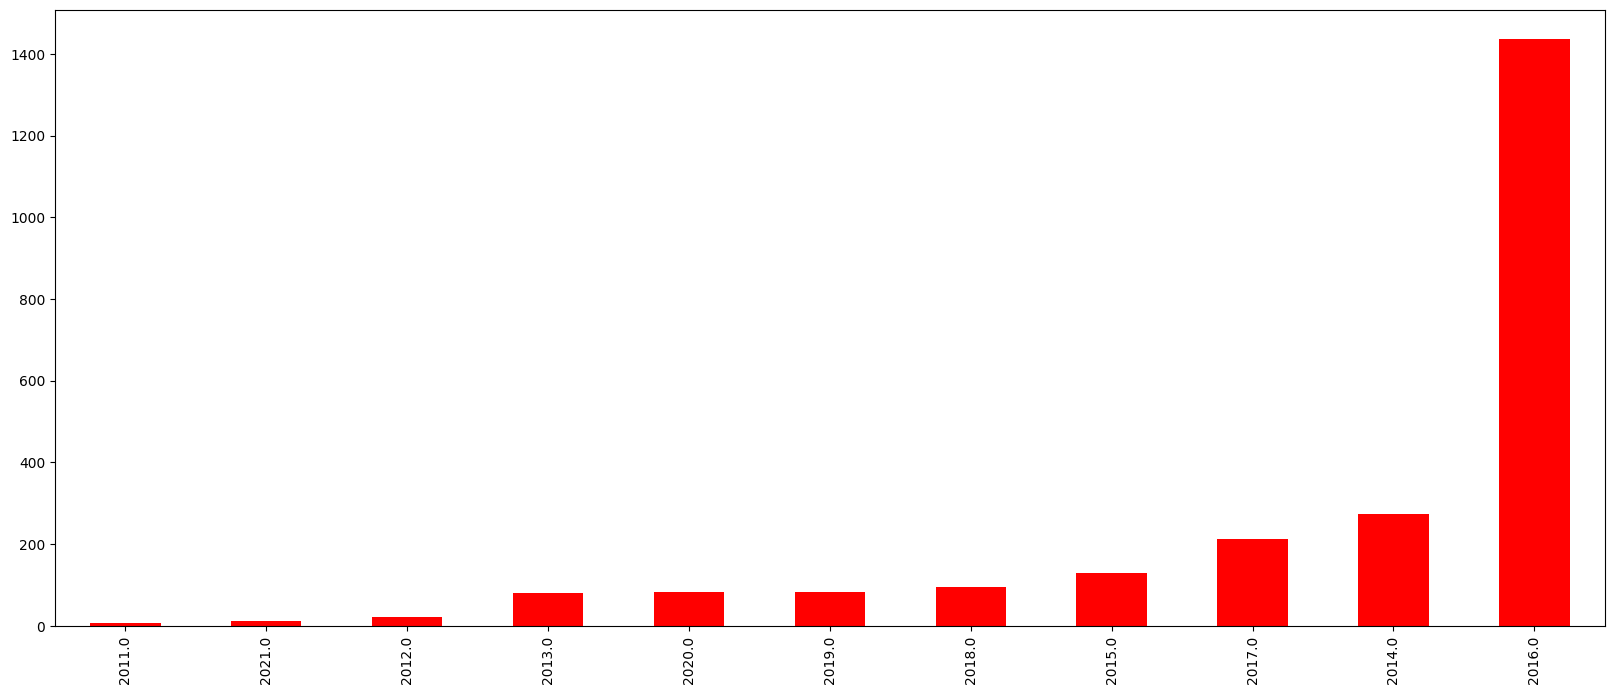

In [ ]:
plt.figure(figsize=(20,8))
df_lumpy[df_lumpy['Year'] == df_lumpy['Year']]['Year'].value_counts().sort_values(ascending=True).plot(kind="bar",color="red")

In [ ]:
## Obervations from reporting Date
 # 1.First report was registered in 2011.(Based on the data which we have we can say that the first case reported in 2011 year.Indirectly it was born in 2011)
 # 2.After 2011 we can see continuously the reportes were increasing every year.
 # 3.In 2016, the cases of this disease are very high and after 2016 its show like the cases counts were decreased.

In [ ]:
df_lumpy['Month'] = df_lumpy['reportingDate'].dt.month
df_lumpy['MonthTitle']= df_lumpy['reportingDate'].dt.month_name()

**2. Year and Month Wise Cases**

In [ ]:
pd.DataFrame(df_lumpy.groupby(['Year','Month'])['Month'].count()).rename(columns={'Month':'CaseCounts'})

CaseCounts
Year   Month            
2011.0 7.0             1
       10.0            3
       11.0            2
2012.0 5.0             2
       7.0             2
       8.0             4
       9.0             1
       10.0            3
       11.0            4
       12.0            5
2013.0 1.0             1
       2.0             3
       3.0            10
       4.0            32
       5.0             5
       7.0             4
       8.0             1
       9.0             4
       11.0           16
       12.0            5
2014.0 1.0            11
       2.0             4
       3.0            10
       4.0            50
       5.0            33
       6.0            31
       7.0            93
       8.0            13
       9.0             6
       10.0           19
       11.0            2
       12.0            3
2015.0 1.0             1
       2.0             6
       3.0             2
       4.0            10
       5.0             1
       8.0            16
       9.0            65
       10.0           28
2016.0 1.0            55
       2.0            46
       3.0            12
       4.0            93
       5.0           182
       6.0           187
       7.0           281
       8.0           146
       9.0           208
       10.0           92
       11.0           84
       12.0           50
2017.0 1.0            31
       2.0            12
       3.0            10
       4.0            14
       5.0            18
       6.0            33
       7.0            36
       8.0            33
       9.0             4
       10.0           10
       11.0            4
       12.0            7
2018.0 1.0            24
       3.0            15
       5.0             2
       7.0            23
       8.0             9
       9.0            11
       10.0            5
       11.0            3
       12.0            2
2019.0 3.0             2
       4.0             8
       6.0             3
       7.0            11
       8.0            12
       9.0            14
       10.0           22
       11.0            3
       12.0            8
2020.0 3.0             1
       4.0             1
       5.0             1
       6.0             2
       7.0            13
       8.0            27
       9.0             8
       10.0           13
       11.0            7
       12.0           10
2021.0 1.0            11

In [ ]:
df_lumpy.pivot_table(index=['Month','MonthTitle'],columns=['Year','region'],values=['lumpy'],aggfunc='count')

lumpy                                                        \
Year             2011.0 2012.0 2013.0       2014.0       2015.0        2016.0   
region           Africa   Asia Africa  Asia Africa  Asia   Asia Europe Africa   
Month MonthTitle                                                                
1.0   January       NaN    NaN    NaN   1.0    NaN  11.0    1.0    NaN    2.0   
2.0   February      NaN    NaN    NaN   3.0    NaN   4.0    NaN    6.0    NaN   
3.0   March         NaN    NaN    NaN  10.0    NaN  10.0    NaN    2.0    NaN   
4.0   April         NaN    NaN    NaN  32.0    NaN  50.0    2.0    8.0    NaN   
5.0   May           NaN    2.0    NaN   5.0    NaN  33.0    1.0    NaN    NaN   
6.0   June          NaN    NaN    NaN   NaN    NaN  31.0    NaN    NaN    NaN   
7.0   July          1.0    2.0    NaN   4.0    NaN  93.0    NaN    NaN    2.0   
8.0   August        NaN    4.0    1.0   NaN    NaN  13.0    1.0   15.0    NaN   
9.0   September     NaN    1.0    NaN   4.0    6.0   NaN    2.0   63.0    2.0   
10.0  October       3.0    3.0    NaN   NaN    NaN  19.0    NaN   28.0    NaN   
11.0  November      2.0    4.0    NaN  16.0    NaN   2.0    NaN    NaN    NaN   
12.0  December      NaN    5.0    4.0   1.0    NaN   3.0    NaN    NaN    NaN   

                                                                           \
Year                         2017.0             2018.0             2019.0   
region           Asia Europe Africa Asia Europe Africa Asia Europe   Asia   
Month MonthTitle                                                            
1.0   January     1.0   52.0    NaN  NaN   31.0    NaN  NaN   24.0    NaN   
2.0   February    2.0   44.0    NaN  NaN   12.0    NaN  NaN    NaN    NaN   
3.0   March       NaN   12.0    4.0  NaN    6.0    NaN  3.0   12.0    1.0   
4.0   April       NaN   93.0    9.0  NaN    5.0    NaN  NaN    NaN    5.0   
5.0   May         NaN  182.0    1.0  NaN   17.0    NaN  NaN    2.0    NaN   
6.0   June        NaN  187.0    2.0  NaN   31.0    NaN  NaN    NaN    2.0   
7.0   July        6.0  273.0   15.0  1.0   20.0   10.0  NaN   13.0    8.0   
8.0   August      2.0  144.0   19.0  NaN   14.0    NaN  1.0    8.0    4.0   
9.0   September   NaN  206.0    NaN  NaN    4.0    NaN  NaN   11.0    8.0   
10.0  October     NaN   92.0    NaN  NaN   10.0    NaN  1.0    4.0   21.0   
11.0  November    NaN   84.0    NaN  NaN    4.0    NaN  1.0    2.0    3.0   
12.0  December    NaN   50.0    NaN  NaN    7.0    NaN  NaN    2.0    2.0   

                                             
Year                    2020.0       2021.0  
region           Europe Africa  Asia   Asia  
Month MonthTitle                             
1.0   January       NaN    NaN   NaN   11.0  
2.0   February      NaN    NaN   NaN    NaN  
3.0   March         1.0    NaN   1.0    NaN  
4.0   April         3.0    NaN   1.0    NaN  
5.0   May           NaN    NaN   1.0    NaN  
6.0   June          1.0    NaN   2.0    NaN  
7.0   July          3.0    NaN  13.0    NaN  
8.0   August        8.0    NaN  27.0    NaN  
9.0   September     6.0    NaN   8.0    NaN  
10.0  October       1.0    NaN  13.0    NaN  
11.0  November      NaN    1.0   6.0    NaN  
12.0  December      6.0    NaN  10.0    NaN

In [ ]:
## From the above pivot table we can check that in which year ,month,region wise how many cases were registered.
## the red mark defines that there were no case registered in that particular month

**3.cld**

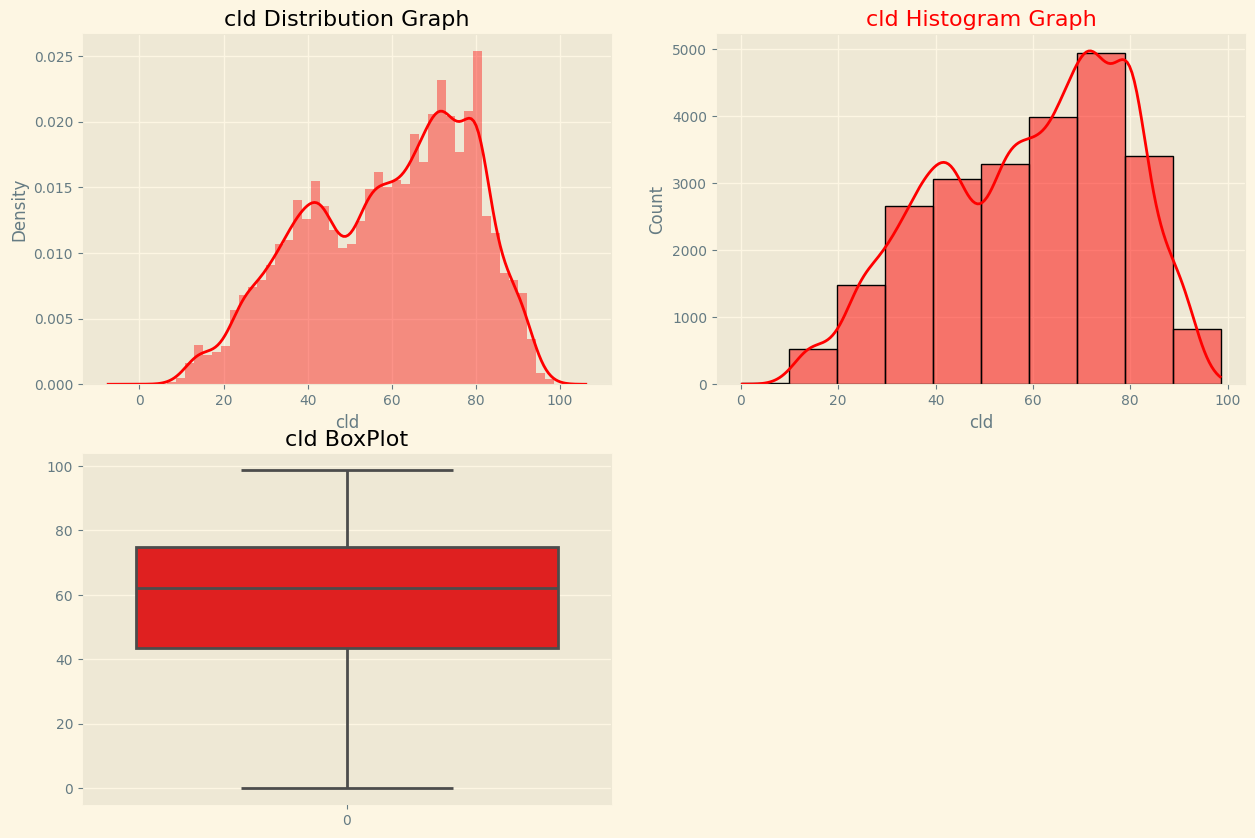

In [ ]:
plotGraph(df_lumpy,'cld')

In [ ]:
## the Observation for cld
# 1. the cld parameter values are look like not normally distrbuted. The values (max.data points parameter values) are inclined to right hand side.
# i.e the distrubution is negative skewed beacause the Mode > Median > Mean.
# 2. Beacause of one sided skewed like Mode is greated then may be we have some outliers in CLD featuer.
# 3.We have multiple bell curve.
# 4.In boxplot we don't have outlier's even the max. values are inclined to right had side.

**4. dtr**

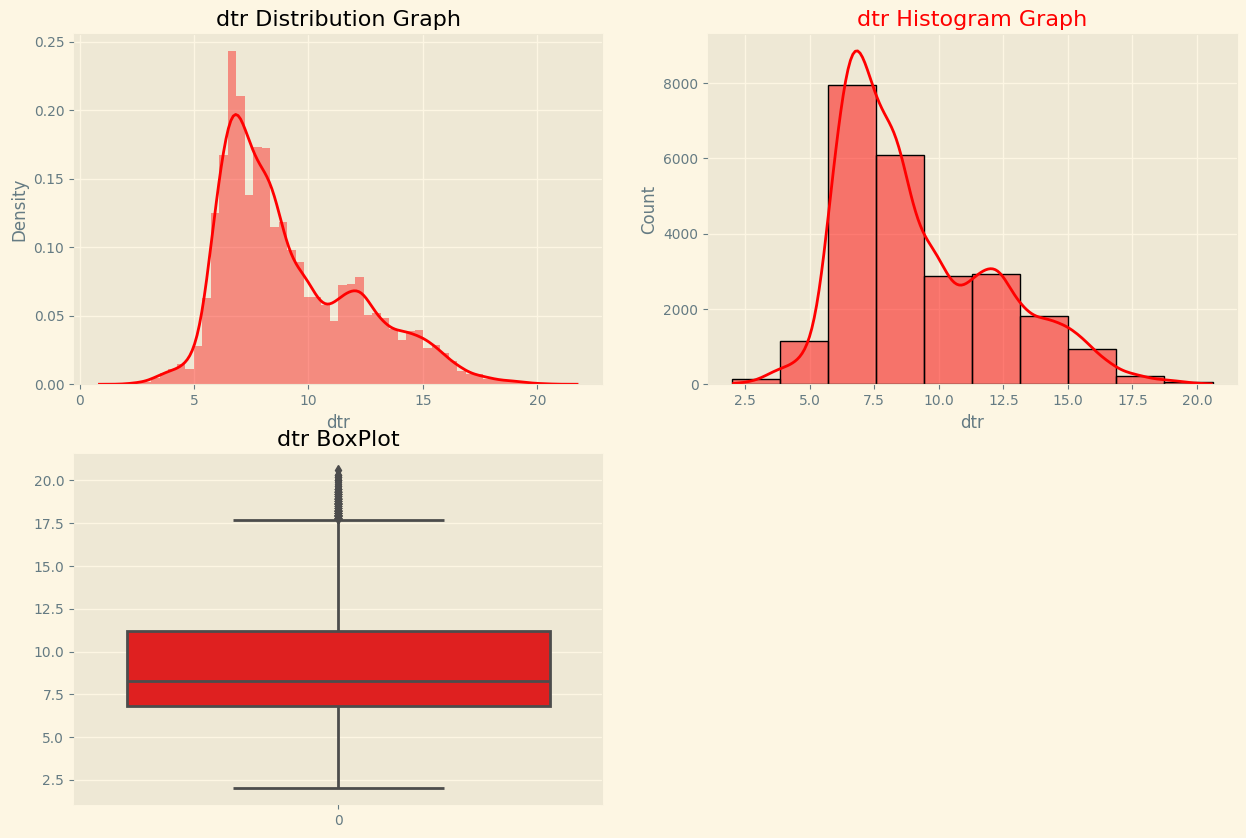

In [ ]:
plotGraph(df_lumpy,'dtr')

In [ ]:
## the Observation for dtr
# 1. the dtr parameter values are look like not normally distrbuted. The values (max.data points parameter values) are inclined to left hand side.
# i.e the distrubution is negative skewed beacause the Mode < Median < Mean.
# 3.We have multiple bell curve.
# 4.In boxplot we have outlier's in Upper Limit for dtr Features.

In [ ]:
df_lumpy.columns

Index(['Longitude', 'Latitude', 'region', 'country', 'reportingDate', 'cld',
       'dtr', 'frs', 'pet', 'pre', 'tmn', 'tmp', 'tmx', 'vap', 'wet',
       'elevation', 'dominant_land_cover', 'X5_Ct_2010_Da', 'X5_Bf_2010_Da',
       'lumpy', 'Year', 'Month', 'MonthTitle'],
      dtype='object')

In [ ]:
df_lumpy.head()

,Longitude,Latitude,region,country,reportingDate,cld,dtr,frs,pet,pre,tmn,tmp,tmx,vap,wet,elevation,dominant_land_cover,X5_Ct_2010_Da,X5_Bf_2010_Da,lumpy,Year,Month,MonthTitle
0,90.380931,22.437184,Asia,Bangladesh,2020-10-09,41.6,12.8,0.00,2.3,1.7,12.7,19.1,25.5,15.7,0.00,147,2,27970.983100,3691.746950,1,2020.0,10.0,October
1,87.854975,22.986757,Asia,India,2019-12-20,40.5,13.3,0.00,2.4,0.0,13.2,19.8,26.5,16.3,0.00,145,2,25063.646690,671.326701,1,2019.0,12.0,December
2,85.279935,23.610181,Asia,India,2019-12-20,27.3,13.6,0.08,2.3,0.6,9.4,16.2,23.0,13.0,0.98,158,2,6038.477155,1426.839831,1,2019.0,12.0,December
3,81.564510,43.882221,Asia,China,2019-10-25,45.3,12.8,31.00,0.4,8.8,-22.5,-16.1,-9.7,0.9,4.64,178,2,760.703340,0.000000,1,2019.0,10.0,October
4,81.161057,43.834976,Asia,China,2019-10-25,38.8,13.2,31.00,0.4,10.5,-20.4,-13.8,-7.2,1.2,1.69,185,3,270.367426,0.000000,1,2019.0,10.0,October


**5.frs**

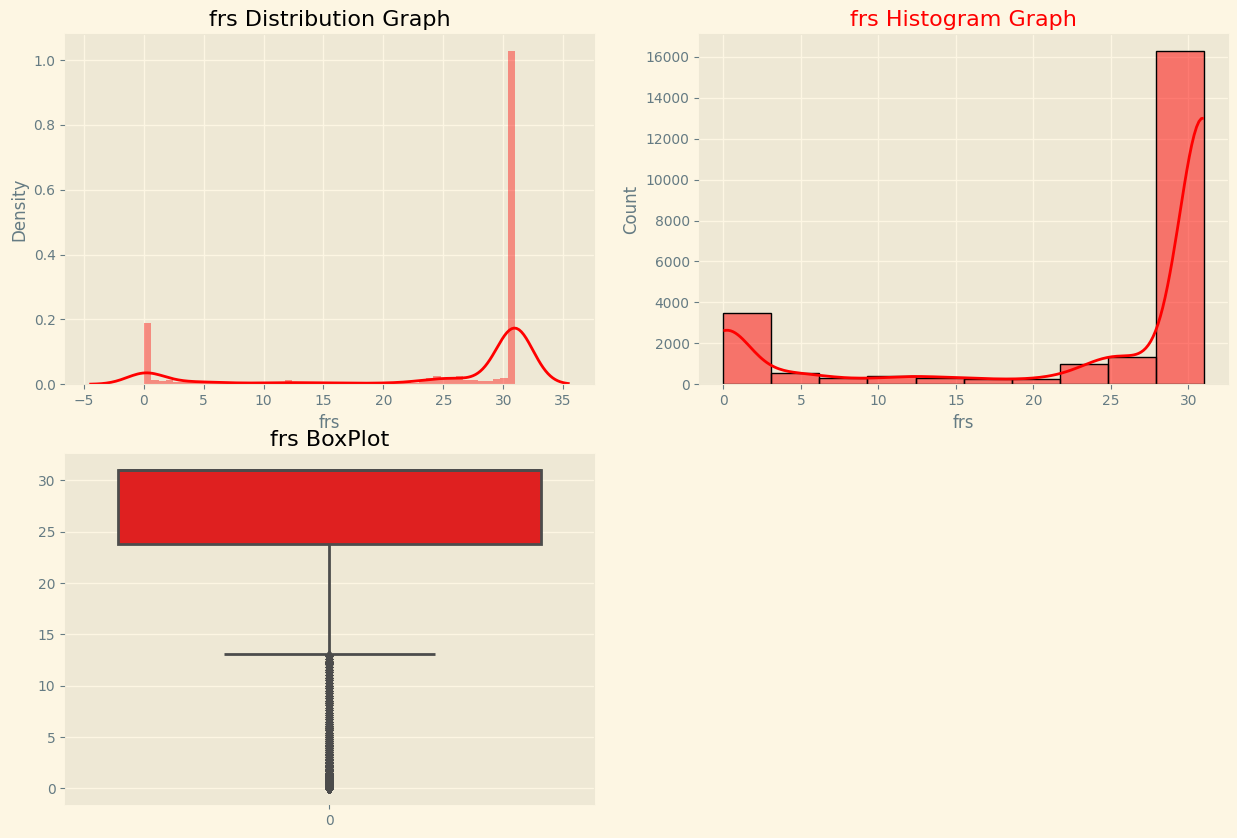

In [ ]:
plotGraph(df_lumpy,'frs')

In [ ]:
## the Observation for frs
# 1.the frs parameter values are look like not normally distrbuted.
# 3.We have multiple bell curve.
# 4.In boxplot we have outlier's in lower Limit for dtr Features.
# 5.It looks like the data/value of frs features doesn't show the any pattern.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target variable
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
# This is required for the Random Forest Classifier to handle non-numerical data
X_encoded = pd.get_dummies(X)

# Split the encoded features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix and Classification Report
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print('Random Forest Classifier Accuracy:', accuracy)
print('Random Forest Classifier Confusion Matrix:')
print(confusion)
print('Random Forest Classifier Classification Report:')
print(report)
print()

# Feature Importances
feature_importances = rf_classifier.feature_importances_
print('Feature Importances:')
for feature, importance in zip(X_encoded.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')


Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Confusion Matrix:
[[5449    0]
 [   0  752]]
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5449
           1       1.00      1.00      1.00       752

    accuracy                           1.00      6201
   macro avg       1.00      1.00      1.00      6201
weighted avg       1.00      1.00      1.00      6201


Feature Importances:
x: 0.0722
y: 0.0552
cld: 0.0217
dtr: 0.0293
frs: 0.0281
pet: 0.0360
pre: 0.0436
tmn: 0.0348
tmp: 0.0303
tmx: 0.0275
vap: 0.0229
wet: 0.0264
elevation: 0.0125
dominant_land_cover: 0.0069
X5_Ct_2010_Da: 0.0292
X5_Bf_2010_Da: 0.0134
region_Africa: 0.0095
region_Asia: 0.0671
region_Europe: 0.2108
country_Albania: 0.0428
country_Angola: 0.0001
country_Armenia: 0.0001
country_Azerbaijan: 0.0012
country_Bangladesh: 0.0013
country_Bhutan: 0.0007
country_Bulgaria: 0.0045
country_Burundi: 0.0002
cou

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
X_encoded = pd.get_dummies(X)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the data
rf_classifier.fit(X_encoded, y)

# Make predictions on the data
y_pred = rf_classifier.predict(X_encoded)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Confusion Matrix and Classification Report
confusion = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# Print the results
print('Random Forest Classifier Accuracy:', accuracy)
print('Random Forest Classifier Confusion Matrix:')
print(confusion)
print('Random Forest Classifier Classification Report:')
print(report)
print()

Random Forest Classifier Accuracy: 1.0
Random Forest Classifier Confusion Matrix:
[[21764     0]
 [    0  3039]]
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21764
           1       1.00      1.00      1.00      3039

    accuracy                           1.00     24803
   macro avg       1.00      1.00      1.00     24803
weighted avg       1.00      1.00      1.00     24803




In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
X_encoded = pd.get_dummies(X)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the data
dt_classifier.fit(X_encoded, y)

# Make predictions on the data
y_pred = dt_classifier.predict(X_encoded)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Confusion Matrix and Classification Report
confusion = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# Print the results
print('Decision Tree Classifier Accuracy:', accuracy)
print('Decision Tree Classifier Confusion Matrix:')
print(confusion)
print('Decision Tree Classifier Classification Report:')
print(report)
print()


Decision Tree Classifier Accuracy: 1.0
Decision Tree Classifier Confusion Matrix:
[[21764     0]
 [    0  3039]]
Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21764
           1       1.00      1.00      1.00      3039

    accuracy                           1.00     24803
   macro avg       1.00      1.00      1.00     24803
weighted avg       1.00      1.00      1.00     24803




In [ ]:
import numpy as np

# Check if X_encoded is a NumPy array
if not isinstance(X_encoded, np.ndarray):
    # Convert X_encoded to a NumPy array
    X_encoded = np.asarray(X_encoded)

# Check if y is a 1D NumPy array
if not isinstance(y, np.ndarray) or y.ndim != 1:
    # Flatten y into a 1D NumPy array
    y = np.ravel(y)


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
X_encoded = pd.get_dummies(X)

# Initialize the KNeighborsClassifier without the random_state keyword argument
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the data
knn_classifier.fit(X_encoded, y)

# Make predictions on the data
y_pred = knn_classifier.predict(X_encoded)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Confusion Matrix and Classification Report
confusion = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# Print the results
print('KNeighborsClassifier Accuracy:', accuracy)
print('KNeighborsClassifier Confusion Matrix:')
print(confusion)
print('KNeighborsClassifier Classification Report:')
print(report)
print()


KNeighborsClassifier Accuracy: 0.9758496956013385
KNeighborsClassifier Confusion Matrix:
[[21434   330]
 [  269  2770]]
KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21764
           1       0.89      0.91      0.90      3039

    accuracy                           0.98     24803
   macro avg       0.94      0.95      0.94     24803
weighted avg       0.98      0.98      0.98     24803




In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
X_encoded = pd.get_dummies(X)

# Initialize the LogisticRegression
lr_classifier = LogisticRegression(random_state=42)

# Fit the model on the data
lr_classifier.fit(X_encoded, y)

# Make predictions on the data
y_pred = lr_classifier.predict(X_encoded)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Confusion Matrix and Classification Report
confusion = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# Print the results
print('LogisticRegression Accuracy:', accuracy)
print('LogisticRegression Confusion Matrix:')
print(confusion)
print('LogisticRegression Classification Report:')
print(report)
print()


LogisticRegression Accuracy: 0.9386364552675079
LogisticRegression Confusion Matrix:
[[21309   455]
 [ 1067  1972]]
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     21764
           1       0.81      0.65      0.72      3039

    accuracy                           0.94     24803
   macro avg       0.88      0.81      0.84     24803
weighted avg       0.94      0.94      0.94     24803




In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
X_encoded = pd.get_dummies(X)

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the model on the data
xgb_classifier.fit(X_encoded, y)

# Make predictions on the data
y_pred = xgb_classifier.predict(X_encoded)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Confusion Matrix and Classification Report
confusion = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# Print the results
print('XGBClassifier Accuracy:', accuracy)
print('XGBClassifier Confusion Matrix:')
print(confusion)
print('XGBClassifier Classification Report:')
print(report)
print()


XGBClassifier Accuracy: 1.0
XGBClassifier Confusion Matrix:
[[21764     0]
 [    0  3039]]
XGBClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21764
           1       1.00      1.00      1.00      3039

    accuracy                           1.00     24803
   macro avg       1.00      1.00      1.00     24803
weighted avg       1.00      1.00      1.00     24803




In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
X_encoded = pd.get_dummies(X)

# Initialize the AdaBoostClassifier
adb_classifier = AdaBoostClassifier(random_state=42)

# Fit the model on the data
adb_classifier.fit(X_encoded, y)

# Make predictions on the data
y_pred = adb_classifier.predict(X_encoded)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

# Confusion Matrix and Classification Report
confusion = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

# Print the results
print('AdaBoostClassifier Accuracy:', accuracy)
print('AdaBoostClassifier Confusion Matrix:')
print(confusion)
print('AdaBoostClassifier Classification Report:')
print(report)
print()


AdaBoostClassifier Accuracy: 1.0
AdaBoostClassifier Confusion Matrix:
[[21764     0]
 [    0  3039]]
AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21764
           1       1.00      1.00      1.00      3039

    accuracy                           1.00     24803
   macro avg       1.00      1.00      1.00     24803
weighted avg       1.00      1.00      1.00     24803




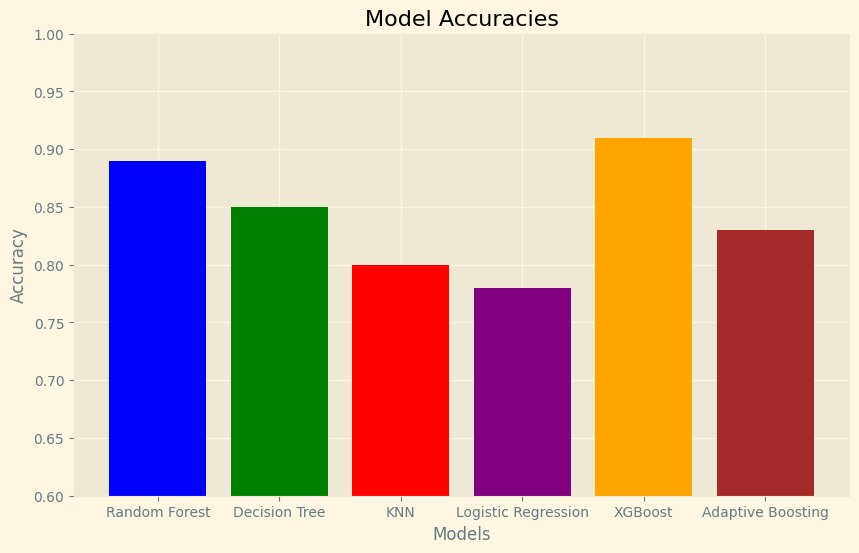

In [ ]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 'XGBoost', 'Adaptive Boosting']
accuracies = [0.89, 0.85, 0.80, 0.78, 0.91, 0.83]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.ylim(0.6, 1)
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')  # Load the CSV file into a DataFrame

# Split the dataset into features and target variable
X = df_lumpy.drop('lumpy', axis=1)  # Separate features (X) from target variable (y)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
# This is required for the Random Forest Classifier to handle non-numerical data
X_encoded = pd.get_dummies(X)  # Convert categorical features to numerical representations

# Evaluate Random Forest Classifier
rf_classifier = RandomForestClassifier()  # Initialize Random Forest Classifier
rf_cv_scores = cross_val_score(rf_classifier, X_encoded, y, cv=5)  # Perform 5-fold cross-validation

rf_mean_accuracy = np.mean(rf_cv_scores)  # Calculate mean accuracy across folds
rf_std_accuracy = np.std(rf_cv_scores)  # Calculate standard deviation of accuracy across folds

rf_classifier.fit(X_encoded, y)  # Fit the model on the entire dataset
rf_y_pred = rf_classifier.predict(X_encoded)  # Make predictions on the entire dataset

rf_accuracy = accuracy_score(y, rf_y_pred)  # Calculate accuracy score for the entire dataset
rf_confusion_matrix = confusion_matrix(y, rf_y_pred)  # Generate confusion matrix
rf_classification_report = classification_report(y, rf_y_pred)  # Generate classification report


# Print Random Forest Classifier results
print("Random Forest Classifier Results:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:")
print(rf_confusion_matrix)
print("Classification Report:")
print(rf_classification_report)
print("Mean Accuracy:", rf_mean_accuracy)
print("Standard Deviation of Accuracy:", rf_std_accuracy)


Random Forest Classifier Results:
Accuracy: 1.0
Confusion Matrix:
[[21764     0]
 [    0  3039]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21764
           1       1.00      1.00      1.00      3039

    accuracy                           1.00     24803
   macro avg       1.00      1.00      1.00     24803
weighted avg       1.00      1.00      1.00     24803

Mean Accuracy: 0.9901211709397819
Standard Deviation of Accuracy: 0.012211911668765684


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Lumpy skin disease dataset
df_lumpy = pd.read_csv('/Lumpy skin disease data.csv')

# Split the dataset into features and target variable
X = df_lumpy.drop('lumpy', axis=1)
y = df_lumpy['lumpy']

# Convert the string values in the X variable to numerics
X_encoded = pd.get_dummies(X)

# Define a more focused hyperparameter grid
param_grid = {
    'n_estimators': range(100, 200, 50),
    'min_samples_split': range(2, 3),
    'min_samples_leaf': range(1, 2),
    'max_depth': [None, 5]
}

# Reduce cross-validation folds to 2
rf_cv = RandomizedSearchCV(RandomForestClassifier(), param_grid, n_iter=100, cv=2)

# Perform RandomizedSearchCV without early stopping
rf_cv.fit(X_encoded, y)

# Extract the best parameters and mean cross-validation score
best_params = rf_cv.best_params_
best_cv_score = rf_cv.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_cv_score)

# Reshape the y array to a 2D array
y = y.values.reshape(-1, 1)

# Train the model on the entire dataset with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_encoded, y)

# Evaluate the best model on a separate test set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)
best_y_pred = best_rf_classifier.predict(X_test)
best_accuracy = accuracy_score(y_test, best_y_pred)

# Print test set accuracy
print("Test set accuracy with best parameters:", best_accuracy)

# Create a confusion matrix
confusion_matrix = confusion_matrix(y_test, best_y_pred)
print("Confusion Matrix:")
print(confusion_matrix)

# Generate a classification report
classification_report = classification_report(y_test, best_y_pred)
print("Classification Report:")
print(classification_report)


Best parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
Best cross-validation score: 0.9579479150732534
Test set accuracy with best parameters: 0.9786333400524088
Confusion Matrix:
[[4340    0]
 [ 106  515]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4340
           1       1.00      0.83      0.91       621

    accuracy                           0.98      4961
   macro avg       0.99      0.91      0.95      4961
weighted avg       0.98      0.98      0.98      4961



In [ ]:
# Evaluate Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)

# Calculate cross-validation scores
rf_cv_scores = cross_val_score(rf_classifier, X_encoded, y, cv=5)
rf_mean_accuracy = np.mean(rf_cv_scores)
rf_std_accuracy = np.std(rf_cv_scores)

# Print results
print("Training Accuracy:", training_accuracy)
print("Testing Accuracy:", testing_accuracy)



Training Accuracy: 1.0
Testing Accuracy: 0.9997984277363435


In [ ]:
import pickle


# Save the model
pickle.dump(rf_classifier, open("rf_classifier_model.pkl", "wb"))
